In [1]:
from spectral_data_types.Channel import Channel
from spectral_data_types.Particle import Particle
from utils.misc import read_in_hdf5_spectra
import h5py
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt 


Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
spectra = read_in_hdf5_spectra("data/210601_NBS295-106/20210601_152616_mass-001.hdf5")
sample = Particle(spectra)

called clean channels


In [3]:
chan1 = sample['chan1']

# Testing savgol filter baseline subtraction

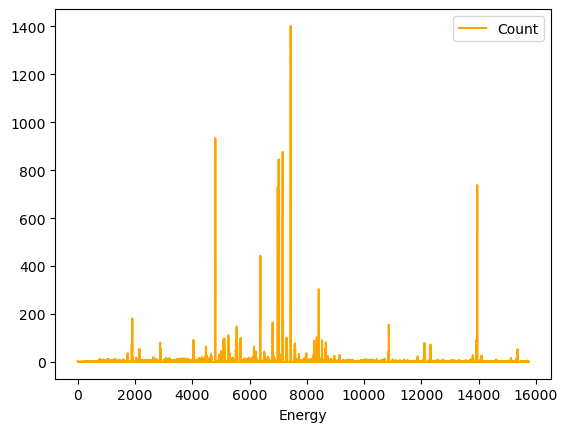

In [4]:
chan1.savgol_baseline_subtract()

chan1.plot_channel(True)

# Testing second deriviative savgol peak finding

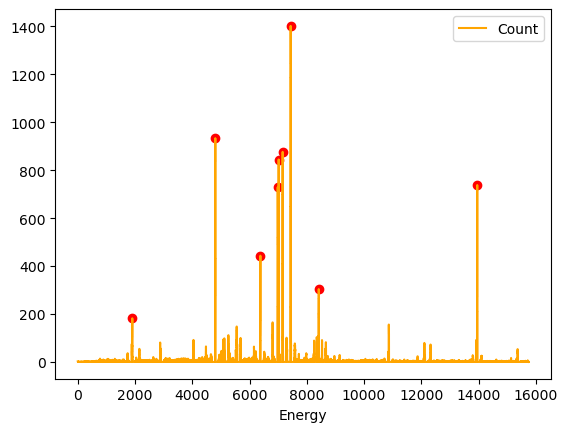

In [5]:
chan1.scipy_peaks()
chan1.plot_channel(True, True)

# Working with algotihimic alignment of peaks

Not working channels are numbers: 163, 255, 229, 33,43,99

259191.39814814815 47294.73144781676


(array([ 1.,  5.,  7., 13., 10., 12., 15., 16., 14., 15.]),
 array([139828. , 159293.9, 178759.8, 198225.7, 217691.6, 237157.5,
        256623.4, 276089.3, 295555.2, 315021.1, 334487. ]),
 <BarContainer object of 10 artists>)

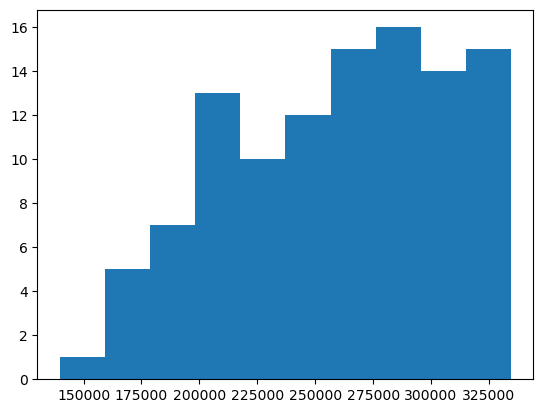

In [6]:
channel_lengths = []
for channel_name in sample.channels.keys():
    chan_x = sample[channel_name]
    # print(len(chan_x.energy))
    channel_lengths.append(len(chan_x.energy))

print(np.mean(channel_lengths), np.std(channel_lengths))
plt.hist(channel_lengths)


In [7]:
# bad_channels = ['chan163', 'chan255', 'chan229', 'chan33', 'chan43', 'chan99']
# for channel_name in bad_channels:
#     chan_x = sample[channel_name]
#     print(len(chan_x.energy))
#     # chan_x.savgol_baseline_subtract()
#     chan_x.scipy_peaks()
#     chan_x.plot_channel(False, True, name = channel_name)

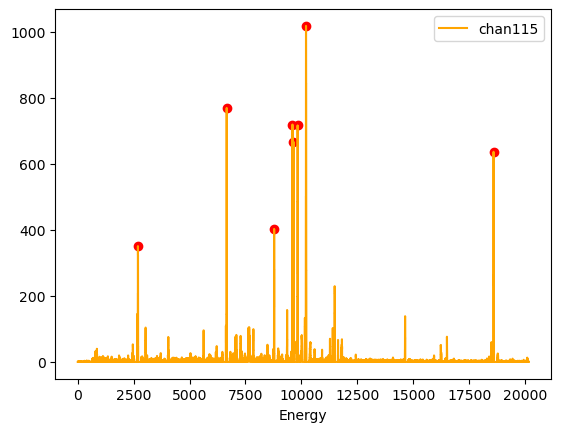

In [8]:
for channel_name in ['chan115']:
    chan_x = sample[channel_name]

    chan_x.savgol_baseline_subtract()
    chan_x.scipy_peaks()
    chan_x.plot_channel(True, True, name = channel_name)

In [9]:
sample.apply(Channel.savgol_baseline_subtract)

{'chan1': 0       2.254639
 1       1.280792
 2       1.306400
 3       0.000000
 4       0.000000
           ...   
 9995    2.131327
 9996    0.000000
 9997    0.164380
 9998    1.181429
 9999    0.198830
 Length: 10000, dtype: float64,
 'chan101': 0       0.000000
 1       0.000000
 2       0.000000
 3       0.172532
 4       0.000000
           ...   
 9995    0.000000
 9996    1.144286
 9997    0.000000
 9998    0.000000
 9999    2.113767
 Length: 10000, dtype: float64,
 'chan103': 0       1.365961
 1       4.416400
 2       0.000000
 3       0.000000
 4       0.000000
           ...   
 9995    0.063229
 9996    5.067132
 9997    2.071540
 9998    1.076463
 9999    1.081912
 Length: 10000, dtype: float64,
 'chan105': 0        3.267806
 1        1.339585
 2        0.000000
 3        0.000000
 4        0.000000
           ...    
 9995     0.000000
 9996     0.000000
 9997     0.783854
 9998    10.582759
 9999    16.377695
 Length: 10000, dtype: float64,
 'chan107': 0       0.00000

In [10]:
sample.apply(Channel.scipy_peaks)

{'chan1': None,
 'chan101': None,
 'chan103': None,
 'chan105': None,
 'chan107': None,
 'chan109': None,
 'chan111': None,
 'chan113': None,
 'chan115': None,
 'chan117': None,
 'chan119': None,
 'chan121': None,
 'chan123': None,
 'chan125': None,
 'chan129': None,
 'chan13': None,
 'chan131': None,
 'chan133': None,
 'chan135': None,
 'chan137': None,
 'chan139': None,
 'chan141': None,
 'chan143': None,
 'chan145': None,
 'chan147': None,
 'chan149': None,
 'chan15': None,
 'chan151': None,
 'chan153': None,
 'chan155': None,
 'chan157': None,
 'chan159': None,
 'chan161': None,
 'chan165': None,
 'chan167': None,
 'chan169': None,
 'chan173': None,
 'chan175': None,
 'chan177': None,
 'chan179': None,
 'chan181': None,
 'chan183': None,
 'chan185': None,
 'chan187': None,
 'chan189': None,
 'chan19': None,
 'chan193': None,
 'chan195': None,
 'chan199': None,
 'chan201': None,
 'chan203': None,
 'chan205': None,
 'chan207': None,
 'chan209': None,
 'chan21': None,
 'chan211': None

In [11]:
sample.algorithmic_aligning()

chan101 [ 2639.0652  6762.4487  9895.084  19201.627 ] 
 chan1: [ 1906.4768  4805.573   7436.9634 13951.662 ]
chan103 [ 2756.7263  6759.966   9776.986  18886.418 ] 
 chan1: [ 1906.4768  4805.573   7436.9634 13951.662 ]
chan105 [ 2494.209   6266.8945  9215.479  18009.848 ] 
 chan1: [ 1906.4768  4805.573   7436.9634 13951.662 ]
chan107 [ 2921.8674  7192.9165 10384.986  19756.084 ] 
 chan1: [ 1906.4768  4805.573   7436.9634 13951.662 ]
chan109 [ 2316.254  5724.267  8407.014 16627.32 ] 
 chan1: [ 1906.4768  4805.573   7436.9634 13951.662 ]
chan111 [ 1776.4343  4449.6514  6516.009  12913.828 ] 
 chan1: [ 1906.4768  4805.573   7436.9634 13951.662 ]
chan113 [ 2329.938  5894.591  8735.437 17466.117] 
 chan1: [ 1906.4768  4805.573   7436.9634 13951.662 ]
chan115 [ 2692.7004  6660.3467  9646.162  18591.512 ] 
 chan1: [ 1906.4768  4805.573   7436.9634 13951.662 ]
chan117 [ 2227.5957  5610.6504  8203.205  16122.348 ] 
 chan1: [ 1906.4768  4805.573   7436.9634 13951.662 ]
chan119 [ 2689.4546  6597.6